# Data inspection and preprocessing - 2, Dimensionality reduction
Code is meant to be **read**! Respect [PEP 8](https://peps.python.org/pep-0008/)!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import loadmat

from sklearn.decomposition import PCA
from sklearn.decomposition import NMF

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

In [2]:
# from notebook 1
data = loadmat("data\\S1_A1_E1.mat")
emg_data = data["emg"]
stimulus = data["stimulus"]
repetition = data["repetition"]

n_channels = emg_data.shape[1]
n_tsteps = 512
n_stimuli = int(np.unique(stimulus).size - 1)  # remove rest
n_repetitions = int(np.unique(repetition).size - 1)  # remove rest
n_epochs = n_stimuli * n_repetitions

emg_tensor = np.zeros((n_stimuli, n_repetitions, n_tsteps, n_channels))

for i in range(n_stimuli):
    for j in range(n_repetitions):
        sel = np.squeeze(np.logical_and(stimulus == (i + 1), repetition == (j + 1)))
        emg_selected_data = emg_data[sel, :]
        emg_tensor[i, j, :, :] = emg_selected_data[:n_tsteps, :]

In [3]:
emg_epochs = np.zeros((n_epochs, n_tsteps, n_channels))
labels = np.zeros(n_epochs).astype(int)
n_epochs = n_stimuli * n_repetitions

epoch_num = 0
for i in range(n_stimuli):
    for j in range(n_repetitions):
        emg_epochs[epoch_num, :, :] = emg_tensor[i, j, :, :]
        labels[epoch_num] = i
        epoch_num += 1

In [4]:
n_features = n_tsteps * n_channels
n_samples = n_epochs

emg_dataset = np.reshape(emg_epochs, [n_samples, n_features])
pca = PCA(n_components=25)
emg_data_pca = pca.fit(emg_dataset).transform(emg_dataset)

Text(0, 0.5, 'Residual variance')

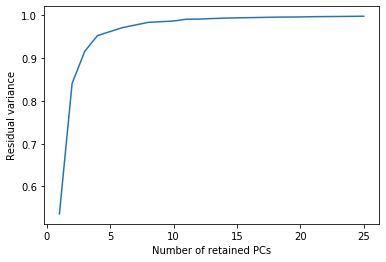

In [5]:
residual_variance = 1 - pca.explained_variance_ratio_
fig, ax = plt.subplots()
ax.plot(np.arange(1, 26), residual_variance)
ax.set_xlabel("Number of retained PCs")
ax.set_ylabel("Residual variance")

Text(0.5, 0, 'PC 3')

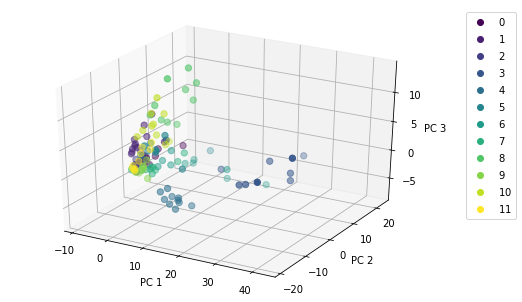

In [6]:
fig = plt.figure()
ax = Axes3D(fig)
sc = ax.scatter(emg_data_pca[:, 0], emg_data_pca[:, 1], emg_data_pca[:, 2], s=40, c=labels, marker='o')
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")

Text(0, 0.5, 'PC 2')

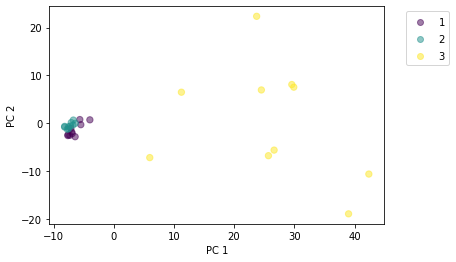

In [7]:
fig, ax = plt.subplots()
sel = np.logical_or.reduce((labels == 1, labels == 2, labels == 3))
sc = ax.scatter(emg_data_pca[sel, 0], emg_data_pca[sel, 1], s=40, c=labels[sel], marker='o', alpha=0.5)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")

Text(0.5, 0, 'PC 3')

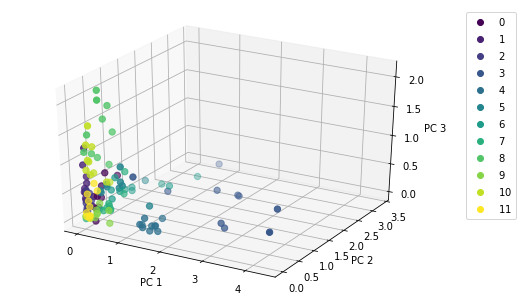

In [8]:
n_features = n_tsteps * n_channels
n_samples = n_epochs

emg_dataset = np.reshape(emg_epochs, [n_samples, n_features])
nmf = NMF(n_components=3, max_iter=1000, init="nndsvda")
emg_data_nmf = nmf.fit(emg_dataset).transform(emg_dataset)

fig = plt.figure()
ax = Axes3D(fig)
sc = ax.scatter(emg_data_nmf[:, 0], emg_data_nmf[:, 1], emg_data_nmf[:, 2], s=40, c=labels, marker='o')
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")

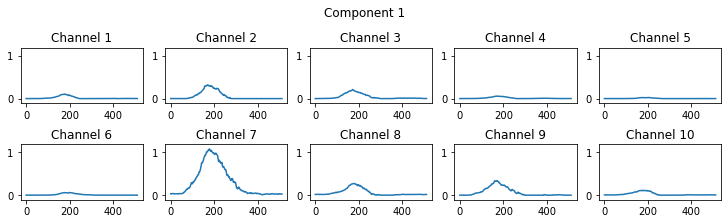

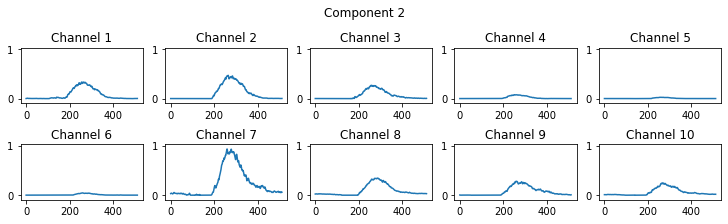

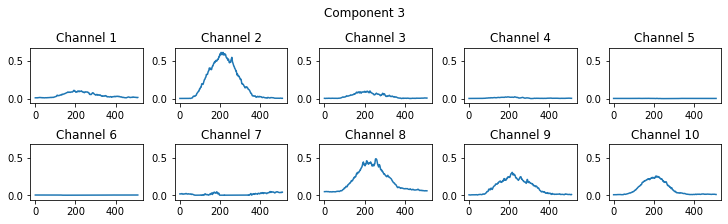

In [9]:
for i in range(nmf.n_components_):
    fig, ax = plt.subplots(2, 5, figsize=(10, 3), constrained_layout=True)
    ax = ax.ravel()
    component = nmf.components_[i, :]
    value_max = np.max(component)
    value_range = value_max
    component_reshaped = np.reshape(component, [n_tsteps, n_channels])
    for j in range(n_channels):
        ax[j].plot(component_reshaped[:, j])
        ax[j].set_ylim([0 - value_range / 10, value_max + value_range / 10])
        ax[j].title.set_text("Channel " + str(j + 1))
    fig.suptitle("Component " + str(i + 1))

Text(0, 0.5, 'PC 2')

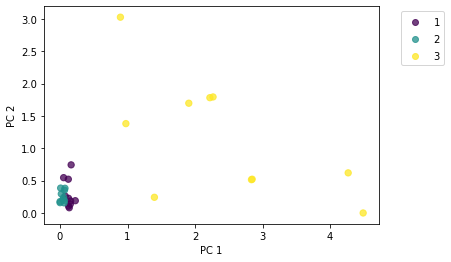

In [10]:
n_features = n_tsteps * n_channels
n_samples = n_epochs

emg_dataset = np.reshape(emg_epochs, [n_samples, n_features])
nmf = NMF(n_components=2, max_iter=1000, init="nndsvda")
emg_data_nmf = nmf.fit(emg_dataset).transform(emg_dataset)

fig, ax = plt.subplots()
sel = np.logical_or.reduce((labels == 1, labels == 2, labels == 3))
sc = ax.scatter(emg_data_nmf[sel, 0], emg_data_nmf[sel, 1], s=40, c=labels[sel], marker='o', alpha=0.75)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")

Text(0.5, 0, 'Channel ID')

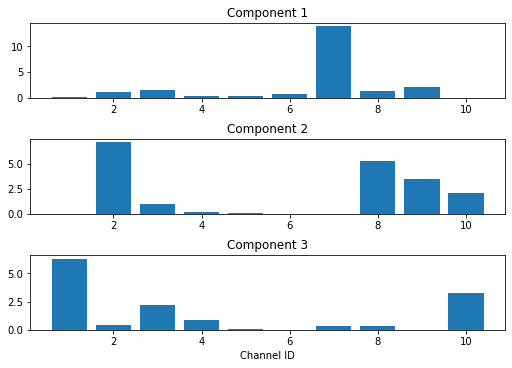

In [11]:
n_features = n_channels
n_samples = n_epochs * n_tsteps

emg_dataset = np.reshape(emg_epochs, [n_samples, n_features])
nmf = NMF(n_components=3, max_iter=1000, init="nndsvda")
emg_data_nmf = nmf.fit(emg_dataset).transform(emg_dataset)

fig, ax = plt.subplots(3, 1, figsize=(7, 5), constrained_layout=True)
for i in range(3):
    component = nmf.components_[i, :]
    ax[i].bar(x=np.arange(1, 11), height=component)
    ax[i].title.set_text("Component " + str(i + 1))

ax[2].set_xlabel("Channel ID")

C:\Users\romeni\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
C:\Users\romeni\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
C:\Users\romeni\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
C:\Users\romeni\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:294: FutureWarning: The 'init' value, 

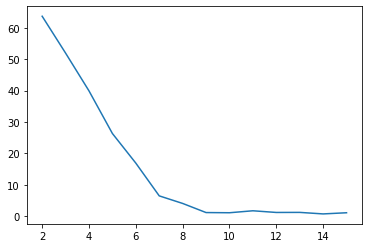

In [12]:
# WARNING!!! It takes quite some time to run (approx 30')
n_components = np.arange(2, 16)
n_trials = n_components.size
errors = np.zeros(n_trials)
for i in range(n_trials):
    nmf = NMF(n_components=n_components[i], max_iter=1000)
    emg_data_nmf = nmf.fit(emg_dataset).transform(emg_dataset)
    errors[i] = nmf.reconstruction_err_
    
fig, ax = plt.subplots()
ax.plot(n_components, errors)

**Questions**
* Are the extracted spatial and spatio-temporal patterns (synergies) stable with respect to data subsampling?
* Are they stable with respect to different preprocessing steps?
* Are they stable when different numbers of patterns are extracted? Do we see some regularities?
* Can you extract spatial and spatio-temporal patterns from ENG?
* How can we use these dimensionality reduction techniques as feature extraction techniques?